
# 数据归一化/标准化

 数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。
 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权
 
最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上

0-1标准化 / Z-score标准化



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# 数据标准化
# （1）0-1标准化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数（即Min=0，Max=1）进行数据的归一化处理
# x = (x - Min) / (Max - Min)

df = pd.DataFrame({"value1":np.random.rand(10)*20,
                  'value2':np.random.rand(10)*100})
print(df.head())
print('------')
# 创建数据

def data_norm(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col + '_n'] = (df_n[col] - mi) / (ma - mi)
    return(df_n)
# 创建函数，标准化数据

df_n = data_norm(df,'value1','value2')
print(df_n.head())
# 标准化数据

      value1     value2
0  13.777176  27.044947
1   5.970817  80.581709
2   8.785321  24.456245
3   2.310968   3.160911
4   6.895941  31.911213
------
      value1     value2  value1_n  value2_n
0  13.777176  27.044947  0.673175  0.300450
1   5.970817  80.581709  0.230359  0.973919
2   8.785321  24.456245  0.390012  0.267886
3   2.310968   3.160911  0.022754  0.000000
4   6.895941  31.911213  0.282837  0.361666


# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

In [3]:
df = pd.DataFrame({"value1":np.random.rand(10) * 100,
                  'value2':np.random.rand(10) * 100})
print(df.head())
print('------')
# 创建数据

def data_Znorm(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean()
        std = df_n[col].std()
        df_n[col + '_Zn'] = (df_n[col] - u) / std
    return(df_n)
# 创建函数，标准化数据

df_z = data_Znorm(df,'value1','value2')
u_z = df_z['value1_Zn'].mean()
std_z = df_z['value1_Zn'].std()
print(df_z)
print('标准化后value1的均值为:%.2f, 标准差为：%.2f' % (u_z, std_z))
# 标准化数据
# 经过处理的数据符合标准正态分布，即均值为0，标准差为1

# 什么情况用Z-score标准化：
# 在分类、聚类算法中，需要使用距离来度量相似性的时候，Z-score表现更好

      value1     value2
0  10.584703  94.034026
1  16.994825  20.236028
2  92.252162  69.820657
3   1.689980   6.551503
4  40.356334  41.891936
------
      value1     value2  value1_Zn  value2_Zn
0  10.584703  94.034026  -0.777910   1.331562
1  16.994825  20.236028  -0.557169  -0.737982
2  92.252162  69.820657   2.034419   0.652538
3   1.689980   6.551503  -1.084212  -1.121742
4  40.356334  41.891936   0.247316  -0.130677
5  34.821837   5.000562   0.056729  -1.165235
6  73.091147   4.467160   1.374584  -1.180194
7  15.714125  56.469261  -0.601271   0.278120
8  32.638420  82.089806  -0.018460   0.996606
9  13.601386  84.956666  -0.674026   1.077003
标准化后value1的均值为:-0.00, 标准差为：1.00


# 案例应用
# 八类产品的两个指标value1，value2，其中value1权重为0.6，value2权重为0.4
# 通过0-1标准化，判断哪个产品综合指标状况最好

,value1,value2,value1_n,value2_n,f
I,29.611706,24.211627,1.000000,0.194251,0.677700
D,26.153351,35.535949,0.881877,0.321332,0.657659
B,10.943114,71.039188,0.362359,0.719748,0.505315
G,3.776384,96.012667,0.117574,1.000000,0.470544
C,15.771421,6.901723,0.527274,0.000000,0.316364
H,1.424764,55.660089,0.037253,0.547165,0.241217
A,6.630910,23.672693,0.215073,0.188203,0.204325
J,2.450292,36.827145,0.072280,0.335822,0.177697
E,3.716832,7.183703,0.115540,0.003164,0.070590
F,0.334099,20.571183,0.000000,0.153398,0.061359


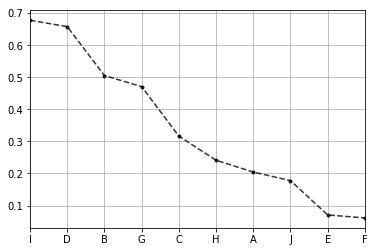

In [4]:
df = pd.DataFrame({"value1":np.random.rand(10) * 30,
                  'value2':np.random.rand(10) * 100},
                 index = list('ABCDEFGHIJ'))
#print(df.head())
#print('------')
# 创建数据"

df_n1 = data_norm(df,'value1','value2')
# 进行标准化处理

df_n1['f'] = df_n1['value1_n'] * 0.6 + df_n1['value2_n'] * 0.4
df_n1.sort_values(by = 'f',inplace=True,ascending=False)
df_n1['f'].plot(kind = 'line', style = '--.k', alpha = 0.8, grid = True)
df_n1
# 查看综合指标状况